## Machine Learning

Tiene el objetivo de diseñar, entender y aplicar algoritmos que aprenden de la experiencia

- Modelar como funcionan las cosas
- Predecir resultados

Predecir puede venir en terminos de eventos que pueden ocurrir o propiedades que aun se desconocen
Por ejemplo: el valor de un inventario en el mercado, recomendaciones de peliculas, que hay en una imagen, traducir lenguajes.

Problemas que tiendan a incluir un valor a futuro basados en valores preexistentes se considera un problema de regresión.

Problemas que busquen categorizar, asociar una entrada con una salida, son problemas de clasificación.

### Aprendizaje Supervisado

Es donde uno establece el comportamiento indicado dando ejemplos con sus respectiva clasificación y los cuales sirven de base para entrenar un algoritmo y esperar que este haga bien su trabajo

Ejemplo: Recomendar peliculas
- Tengo un conjunto de peliculas que ya he visto y puedo usar la experiencia para saber si me gustaría ver otras peliculas
- Cada pelicula que he visto puedo darle un valor que indica qué tanto me gustó
- Aunque un algoritmo puede entender los valores, no entiende nada sobre peliculas
- Pero esto se puede hacer construyendo un vector de caracteristicas para cada pelicula
- Puedo indicar con 0 o 1 si esa pelicula es de un genero o no (ej: ciencia ficcion? 0:1 etc) asi podemos generar un vector binario asosiado a cada pelicula
- Dado que el computador ya puede entender los datos, los datos que ya he calificado sirven como un conjunto de entrenamiento para recomendar otras peliculas
- La tarea del algoritmo de aprendizaje ahora es mapear esos vectores a esas calificaciones (clasificador)
- Las peliculas que no he calificado se vuelven en el conjunto de prueba
- Nos interesa generalizar el mapeo generado, a las peliculas que aun no hemos visto y esperamos que eso funcione

#### Clasificadores lineales

El clasificador más simple es conocido como un clasificador lineal, sin embargo este puede clasificar elementos que no necesariamente tengan la calificación esperada, por lo tanto necesitamos de alguna forma evaluar que tan bueno es el clasificador en relación al entrenamiento

En general un clasificador es una función que actua sobre un vector de caracteristicas X y da como resultado un valor/etiqueta

$
h(x^{(i)}) = y^{(i)}
$ donde i se mueve entre 0 y n

Si representamos los datos ubicados en un plano 2D, un clasificador lineal se encargaria de trazar una linea dividiento los datos en dos grupos, Ej: si queremos clasificar datos en dos etiquetas entonces un grupo encima de la linea seria clasificado como una etiqueta A y el otro como una etiqueta B y la linea que los divide se llamaria frontera de decisión

Debido a que el vector de caracteristicas puede ser de tamaño n obtenemos que para n=3 la frontera de decisión es un plano y para n>3 es un hiperplano, estas fronteras dividen el espacio en 2 mitades

#### Separación Lineal

Para proceder con los clasificadores lineales es necesario conocer la matemática que nos permita hacer lo descrito y para esto necesitamos saber ecuaciones lineales y algebra lineal

Una ecuacion lineal sencilla se puede parametrizar de la siguiente forma:

$y = \theta_0 x + \hat\theta$

$\theta_0 x + \theta_1 y + \hat\theta = 0$

puede verse como:

$\Theta \cdot X + \hat\theta= 0$  

donde

$\Theta = \begin{bmatrix} \theta_0 \\  \theta_1 \end{bmatrix} $

$X = \begin{bmatrix} X_0 \\  X_1 \end{bmatrix} $

Esta parametrización se cumple para n-dimensiones, donde $\Theta_n = (\theta_0, \theta_1, ..., \theta_{n-1})^T$ y $X_n = (X_0, X_1, ..., X_{n-1})^T$

Cuando tenemos un conjunto de puntos arbitrarios podemos saber alguno de estos se encuentra a un lado u otro de la frontera de decisión representada por la recta $\Theta \cdot X + \hat\theta= 0$ aplicando el producto punto con el vector normal $\Theta$

Supongamos que tenemos la siguiente recta y los siguientes puntos:

In [ ]:
!pip install matplotlib

In [ ]:
!pip install numpy

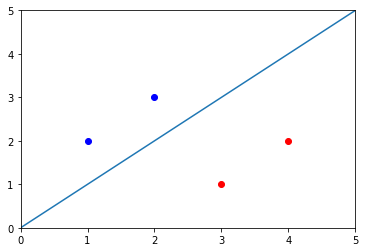

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fd = list(range(6))
x = [1,2,3,4]
y = [2,3,1,2]
plt.axis([0, 5, 0, 5])
plt.plot(x[:2],y[:2], 'bo')
plt.plot(x[2:],y[2:], 'ro')
plt.plot(fd, np.poly1d([1,0])(fd))
plt.show()

$
X_1 = (1,2) \\
X_2 = (2,3) \\
X_3 = (3,1) \\
X_4 = (4,2) \\
$

El vector normal de la recta azul es:

$
\Theta = \begin{bmatrix} 1 \\ -1 \end{bmatrix}
$

Si aplicamos el producto punto podemos observar que si el resultado es negativo entonces el punto X se encuentra a la izquierda de la recta, y si el resultado es positivo entones está a la derecha de la recta. Si el producto punto diera 0 implicaría que el punto se encuentra sobre la recta.

In [2]:
Xs = list(zip(x,y))

def Separate(Xs, NormalVector):
    for x in Xs:
        cdot = np.dot(np.array(x),np.array(NormalVector))
        if cdot < 0:
            print(x, "Está a la izquierda (-)")
        else:
            print(x, "Está a la derecha (+)")
            
Separate(Xs, [1,-1])

(1, 2) Está a la izquierda (-)
(2, 3) Está a la izquierda (-)
(3, 1) Está a la derecha (+)
(4, 2) Está a la derecha (+)


Notese que estamos tomando en cuenta una recta que pasa necesariamente por el origen o cordenadas (0,0), sin embargo esto no siempre nos va a permitir separar linealmente dos grupos de datos, además existen conjuntos de datos que no son linealmente separables en 2 dimensiones, Ejemplo: No es posible trazar una linea que separe los siguientes puntos en dos grupos del mismo color

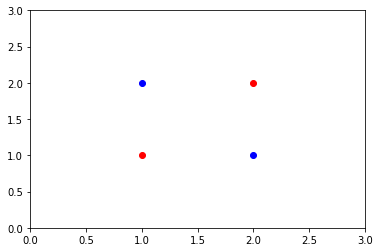

In [3]:
plt.axis([0, 3, 0, 3])
plt.plot(1,2, 'bo')
plt.plot(1,1, 'ro')
plt.plot(2,1, 'bo')
plt.plot(2,2, 'ro')
plt.show()

#### Entrenamiento y Clasificación: Perceptrón

De acuerdo a los ejemplos anteriores podemos decir que el resultado de la clasificación es (-) o (+) de acuerdo a si los puntos están en un lado u otro de la recta que los separa, por lo tanto

$
h(x^{(i)}) = y^{(i)} \\
h((1,2)) = (-) \\
h((3,1)) = (+) \\
$  
que se puede ver como  
$
h((1,2)) = -1 \\
h((3,1)) = +1 \\
$

Se puede decir entonces que el objetivo de un clasificador lineal es encontrar el vector normal $\Theta$ tal que permita separar los datos en las etiquetas -1 y +1

El algoritmo perceptrón es un algoritmo el cual nos permite realizar el entrenamiento y encontrar ese vector que nos permitirá hacer la separación, su pseudocódigo es el siguiente
&nbsp;

$PERCEPTRON1(\{(x^{(i)}, y^{(i)}), i=1,...,n\},T)$  
$\Theta = 0, \hat\theta = 0$  
$for$ $ t = 1,...,T $ $do$  
> $for$ $ i = 1,...,n $ $do$  
> > $if$ $ y^{(i)}(\Theta \cdot x^{(i)}) \leq 0 $ $then$  
> > > $\Theta = \Theta + y^{(i)}x^{(i)}$  
> > > $\hat\theta = \hat\theta + y^{(i)}$

$return$ $\Theta, \hat\theta$

donde T es el numero de iteraciones que corre el algoritmo

$ y^{(i)}(\Theta \cdot x^{(i)}) \leq 0 $ es el error que representa si un punto X no es clasificado correctamente, es decir:

Si $ \Theta \cdot x^{(i)} $ da como resultado $1$ y el valor $ y^{(i)} $ esperado era $-1$ entonces es un error; lo mismo si el resultado del producto punto es $-1$ y se esperaba $1$, si el resultado es 0 también se toma como error; entonces se opera $\Theta = \Theta + y^{(i)}x^{(i)}$ para corregir ese error

#### Código Perceptron

In [4]:
# X: Datos de entrenamiento
# Y: clasificación x[i]
# n: numero de elementos del set de prueba
def Perceptron(X,Y,n, T):
    Theta,theta = np.array([0,0]), 0
    for _ in range(T):
        for i in range(n):
            x = X[i]
            y = Y[i]
            TdotX = np.dot(Theta,x)
            yx    = np.inner(y,x)
            if y*TdotX <= 0:
                Theta += yx
                theta += y
    return Theta,theta

Si probamos el primer ejemplo que presentamos al inicio obtenemos lo siguiente:

(1, 2) Está a la izquierda (-)
(2, 3) Está a la izquierda (-)
(3, 1) Está a la derecha (+)
(4, 2) Está a la derecha (+)


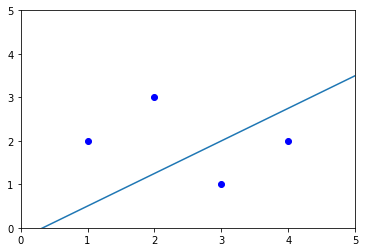

In [5]:
fd = list(range(6))
x = [1,2,3,4]
y = [2,3,1,2]
X = list(zip(x,y)) # Genera una lista de puntos [x,y]
Y = [-1,-1,1,1]    # Clasificación de los putos
n = 4              # Numero de puntos
Theta,theta = Perceptron(X,Y,n, 10)  # Se entrena el modelo

Separate(Xs, Theta)

plt.axis([0, 5, 0, 5])
plt.plot(x,y, 'bo')

poly = np.poly1d([(Theta[0])/(-Theta[1]),theta/(-Theta[1])])
plt.plot(fd, poly(fd))
plt.show()

#### Ejemplo de juguete usando SciKit-Learn

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)
X[:5], y[:5]

In [ ]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y == label)
    ax.scatter(X[mask, 0], X[mask, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [ ]:
clf = Perceptron(max_iter=40, random_state=0)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Test accuracy: %.4f' % accuracy_score(y_test, y_pred))

In [ ]:
theta = clf.coef_[0]
theta_0 = clf.intercept_

In [ ]:
fig, ax = plt.subplots()
for label in [0, 1]:
    mask = (y_train == label)
    ax.scatter(X_train[mask, 0], X_train[mask, 1])
for label in [0, 1]:
    mask = (y_test == label)
    ax.scatter(X_test[mask, 0], X_test[mask, 1])
x_bnd = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1,  400)
y_bnd = - x_bnd * (theta[0] /theta[1]) - (theta_0 / theta[1])
ax.plot(x_bnd, y_bnd)

### Aprendizaje No Supervisado

### Aprendizaje Semi-Supervisado

### Aprendizaje Activo

### Transferencia de Aprendizaje

### Aprendizaje Reforzado

### Referencias
- [Machine Learning with Python-From Linear Models to Deep Learning](https://courses.edx.org/courses/course-v1:MITx+6.86x+1T2019/)
- [Linear Regression](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/tensorflow_v2/notebooks/2_BasicModels/linear_regression.ipynb)
- [Random Forest](https://github.com/aymericdamien/TensorFlow-Examples/blob/master/notebooks/2_BasicModels/random_forest.ipynb)(TensorFlow v1)
- [Neural Networks](https://colab.research.google.com/drive/1B1ZFXIPgDjKg7TQHhd7Nlmi5oz-N3CNo)
- [Convolutional Neural Network](https://www.tensorflow.org/tutorials/images/cnn)
- [Other Neural Networks Examples](https://github.com/aymericdamien/TensorFlow-Examples/tree/master/tensorflow_v2/notebooks/3_NeuralNetworks)